In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/09_Sep.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,26.000000,84.000000,1,6,1,2611.0,2627.0,2573.0,3066.0,3156.0,3562.0,2628.416667,2696.0
1,26.000000,84.666667,1,6,1,2634.0,2624.0,2597.0,3057.0,3098.0,3513.0,2635.750000,2685.0
2,26.000000,85.333333,1,6,1,2652.0,2598.0,2627.0,3028.0,3090.0,3487.0,2639.166667,2668.0
3,26.000000,86.000000,1,6,1,2662.0,2608.0,2605.0,2988.0,3052.0,3468.0,2641.666667,2635.0
4,26.000000,86.666667,2,6,1,2696.0,2611.0,2627.0,2968.0,3055.0,3477.0,2641.000000,2619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,25.212452,87.862340,23,2,1,2694.0,2709.0,2765.0,2363.0,2560.0,3293.0,2691.250000,2656.0
8636,25.212452,87.862340,24,2,1,2681.0,2691.0,2748.0,2344.0,2545.0,3289.0,2683.000000,2649.0
8637,25.212452,87.862340,24,2,1,2663.0,2675.0,2708.0,2331.0,2534.0,3275.0,2673.583333,2595.0
8638,25.000000,87.862340,24,2,1,2682.0,2701.0,2687.0,2316.0,2542.0,3251.0,2664.750000,2581.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7200][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.023783,-1.122319,1.231476,-1.660891,0.955554,0.749919,-1.221217,-1.184989,-1.310672,-0.208495,-0.026899,0.899237,-1.198427
1,-1.049229,-1.122319,1.279603,-1.660891,0.955554,0.749919,-1.168040,-1.191922,-1.255233,-0.229370,-0.162437,0.784316,-1.181228
2,-1.088554,-1.122319,1.327731,-1.660891,0.955554,0.749919,-1.126423,-1.252007,-1.185935,-0.296633,-0.181132,0.723337,-1.173215
3,-1.164890,-1.122319,1.375859,-1.660891,0.955554,0.749919,-1.103303,-1.228897,-1.236754,-0.389411,-0.269934,0.678776,-1.167352
4,-1.201901,-1.122319,1.423986,-1.516446,0.955554,0.749919,-1.024694,-1.221965,-1.185935,-0.435799,-0.262923,0.699884,-1.168916


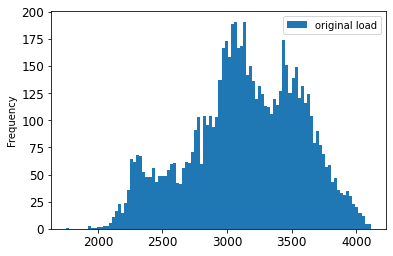

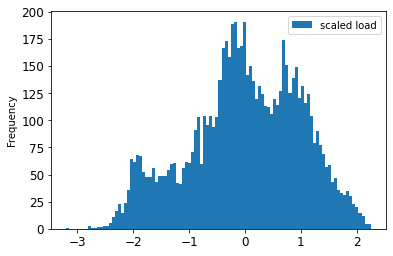

In [9]:
stlf_data[stlf_data.index <= 7200][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7200][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

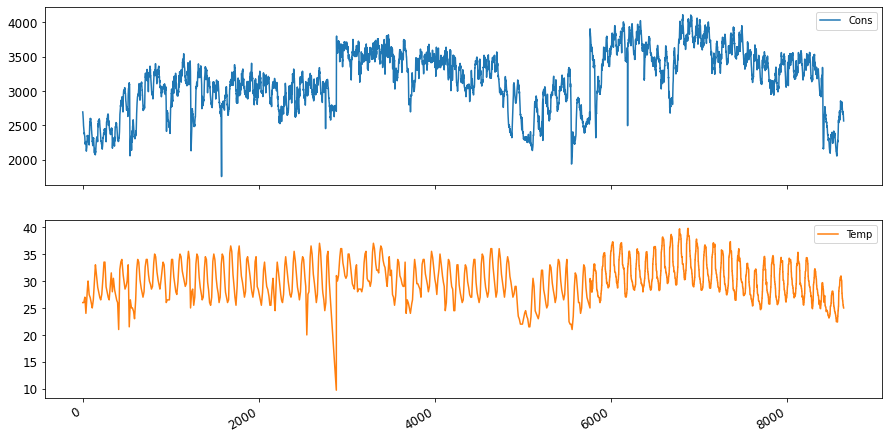

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.023783,-1.122319,1.231476,-1.660891,0.955554,0.749919,-1.221217,-1.184989,-1.310672,-0.208495,-0.026899,0.899237,-1.198427,-1.655292
1,-1.049229,-1.122319,1.279603,-1.660891,0.955554,0.749919,-1.168040,-1.191922,-1.255233,-0.229370,-0.162437,0.784316,-1.181228,-1.657605
2,-1.088554,-1.122319,1.327731,-1.660891,0.955554,0.749919,-1.126423,-1.252007,-1.185935,-0.296633,-0.181132,0.723337,-1.173215,-1.740881
3,-1.164890,-1.122319,1.375859,-1.660891,0.955554,0.749919,-1.103303,-1.228897,-1.236754,-0.389411,-0.269934,0.678776,-1.167352,-1.766326
4,-1.201901,-1.122319,1.423986,-1.516446,0.955554,0.749919,-1.024694,-1.221965,-1.185935,-0.435799,-0.262923,0.699884,-1.168916,-1.782519
5,-1.238913,-1.122319,1.472114,-1.516446,0.955554,0.749919,-1.050126,-1.168812,-1.192864,-0.526257,-0.328355,0.624833,-1.173020,-1.819530
6,-1.275924,-1.122319,1.520242,-1.516446,0.955554,0.749919,-1.089431,-1.127215,-1.252923,-0.602798,-0.365745,0.563854,-1.175170,-1.872734
7,-1.366140,-1.122319,1.568369,-1.516446,0.955554,0.749919,-1.165728,-1.104105,-1.229824,-0.649187,-0.435851,0.545091,-1.186896,-1.986082
8,-1.444789,-1.122319,1.616497,-1.372000,0.955554,0.749919,-1.202721,-1.025532,-1.222894,-0.658465,-0.447536,0.484113,-1.205854,-2.016154
9,-1.481800,-1.122319,1.664625,-1.372000,0.955554,0.749919,-1.239714,-1.050953,-1.169765,-0.774437,-0.480252,0.427824,-1.232433,-2.002274


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-1.023783,-1.122319,1.231476,-1.660891,0.955554,0.749919,-1.221217,-1.184989,-1.310672,-0.208495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.023783
1,-1.049229,-1.122319,1.279603,-1.660891,0.955554,0.749919,-1.168040,-1.191922,-1.255233,-0.229370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.023783,-1.049229
2,-1.088554,-1.122319,1.327731,-1.660891,0.955554,0.749919,-1.126423,-1.252007,-1.185935,-0.296633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.023783,-1.049229,-1.088554
3,-1.164890,-1.122319,1.375859,-1.660891,0.955554,0.749919,-1.103303,-1.228897,-1.236754,-0.389411,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.023783,-1.049229,-1.088554,-1.164890
4,-1.201901,-1.122319,1.423986,-1.516446,0.955554,0.749919,-1.024694,-1.221965,-1.185935,-0.435799,...,NaN,NaN,NaN,NaN,NaN,-1.023783,-1.049229,-1.088554,-1.164890,-1.201901
5,-1.238913,-1.122319,1.472114,-1.516446,0.955554,0.749919,-1.050126,-1.168812,-1.192864,-0.526257,...,NaN,NaN,NaN,NaN,-1.023783,-1.049229,-1.088554,-1.164890,-1.201901,-1.238913
6,-1.275924,-1.122319,1.520242,-1.516446,0.955554,0.749919,-1.089431,-1.127215,-1.252923,-0.602798,...,NaN,NaN,NaN,-1.023783,-1.049229,-1.088554,-1.164890,-1.201901,-1.238913,-1.275924
7,-1.366140,-1.122319,1.568369,-1.516446,0.955554,0.749919,-1.165728,-1.104105,-1.229824,-0.649187,...,NaN,NaN,-1.023783,-1.049229,-1.088554,-1.164890,-1.201901,-1.238913,-1.275924,-1.366140
8,-1.444789,-1.122319,1.616497,-1.372000,0.955554,0.749919,-1.202721,-1.025532,-1.222894,-0.658465,...,NaN,-1.023783,-1.049229,-1.088554,-1.164890,-1.201901,-1.238913,-1.275924,-1.366140,-1.444789
9,-1.481800,-1.122319,1.664625,-1.372000,0.955554,0.749919,-1.239714,-1.050953,-1.169765,-0.774437,...,-1.023783,-1.049229,-1.088554,-1.164890,-1.201901,-1.238913,-1.275924,-1.366140,-1.444789,-1.481800


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.521125,-1.122319,1.712752,-1.372000,0.955554,0.749919,-1.276706,-1.090239,-1.128186,-0.741964,...,-1.049229,-1.088554,-1.164890,-1.201901,-1.238913,-1.275924,-1.366140,-1.444789,-1.481800,-1.521125
11,-1.574329,-1.122319,1.760880,-1.372000,0.955554,0.749919,-1.366876,-1.166501,-1.105086,-0.846339,...,-1.088554,-1.164890,-1.201901,-1.238913,-1.275924,-1.366140,-1.444789,-1.481800,-1.521125,-1.574329
12,-1.622907,-1.122319,1.809008,-1.227555,0.955554,0.749919,-1.445485,-1.203477,-1.026547,-0.883450,...,-1.164890,-1.201901,-1.238913,-1.275924,-1.366140,-1.444789,-1.481800,-1.521125,-1.574329,-1.622907
13,-1.657605,-1.099679,1.760880,-1.227555,0.955554,0.749919,-1.482478,-1.240452,-1.051957,-0.915922,...,-1.201901,-1.238913,-1.275924,-1.366140,-1.444789,-1.481800,-1.521125,-1.574329,-1.622907,-1.657605
14,-1.678424,-1.077039,1.712752,-1.227555,0.955554,0.749919,-1.521783,-1.277428,-1.091226,-1.017977,...,-1.238913,-1.275924,-1.366140,-1.444789,-1.481800,-1.521125,-1.574329,-1.622907,-1.657605,-1.678424


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7091 entries, 10 to 7100
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  7091 non-null   float64
 1   Temp           7091 non-null   float64
 2   Hum            7091 non-null   float64
 3   A              7091 non-null   float64
 4   B              7091 non-null   float64
 5   C              7091 non-null   float64
 6   D              7091 non-null   float64
 7   E              7091 non-null   float64
 8   F              7091 non-null   float64
 9   G              7091 non-null   float64
 10  H              7091 non-null   float64
 11  I              7091 non-null   float64
 12  J              7091 non-null   float64
 13  y_t+100        7091 non-null   float64
 14  Cons_t-10      7091 non-null   float64
 15  Cons_t-9       7091 non-null   float64
 16  Cons_t-8       7091 non-null   float64
 17  Cons_t-7       7091 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-2.071671
11,-2.073984
12,-2.101743
13,-2.124875
14,-2.159573
...,...
7096,1.259362
7097,1.273241
7098,1.317192
7099,1.358830


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.521125,-1.521125,-1.481800,-1.444789,-1.366140,-1.275924,-1.238913,-1.201901,-1.164890,-1.088554,...,-1.372000,0.955554,0.749919,-1.276706,-1.090239,-1.128186,-0.741964,-0.526989,0.416098,-1.265853
11,-1.574329,-1.574329,-1.521125,-1.481800,-1.444789,-1.366140,-1.275924,-1.238913,-1.201901,-1.164890,...,-1.372000,0.955554,0.749919,-1.366876,-1.166501,-1.105086,-0.846339,-0.552695,0.364500,-1.305723
12,-1.622907,-1.622907,-1.574329,-1.521125,-1.481800,-1.444789,-1.366140,-1.275924,-1.238913,-1.201901,...,-1.227555,0.955554,0.749919,-1.445485,-1.203477,-1.026547,-0.883450,-0.578401,0.298831,-1.356342
13,-1.657605,-1.657605,-1.622907,-1.574329,-1.521125,-1.481800,-1.444789,-1.366140,-1.275924,-1.238913,...,-1.227555,0.955554,0.749919,-1.482478,-1.240452,-1.051957,-0.915922,-0.618127,0.242543,-1.407742
14,-1.678424,-1.678424,-1.657605,-1.622907,-1.574329,-1.521125,-1.481800,-1.444789,-1.366140,-1.275924,...,-1.227555,0.955554,0.749919,-1.521783,-1.277428,-1.091226,-1.017977,-0.657854,0.165147,-1.457579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,1.879304,1.879304,1.673428,1.698873,1.650296,1.638729,1.613284,1.613284,1.543888,1.606344,...,1.516907,1.439719,-1.333478,1.636469,1.602040,1.544439,1.844203,2.120686,2.043763,1.645798
7097,1.846919,1.846919,1.879304,1.673428,1.698873,1.650296,1.638729,1.613284,1.613284,1.543888,...,1.516907,1.439719,-1.333478,1.648029,1.539644,1.525959,1.897550,2.167424,2.032036,1.672378
7098,1.904749,1.904749,1.846919,1.879304,1.673428,1.698873,1.650296,1.638729,1.613284,1.613284,...,1.516907,1.439719,-1.333478,1.696582,1.608973,1.456660,1.983369,2.092644,1.978093,1.709707
7099,1.937134,1.937134,1.904749,1.846919,1.879304,1.673428,1.698873,1.650296,1.638729,1.613284,...,1.516907,1.439719,-1.333478,1.671149,1.608973,1.583708,2.048314,2.097318,2.175101,1.739023


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7091, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(7091,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,3667.0,30.66245,74.458360,1.0,2.0,1.0,3689.0,3652.0,3526.0,3978.0,3794.0,4043.0,3665.333333
7202,3698.0,30.40745,75.973475,1.0,2.0,1.0,3708.0,3653.0,3582.0,3949.0,3771.0,4018.0,3675.000000
7203,3687.0,30.15245,77.488590,1.0,2.0,1.0,3726.0,3691.0,3614.0,3928.0,3900.0,4019.0,3681.083333
7204,3669.0,30.15245,77.488590,2.0,2.0,1.0,3698.0,3683.0,3621.0,3906.0,3955.0,3986.0,3685.083333
7205,3633.0,30.15245,77.488590,2.0,2.0,1.0,3667.0,3689.0,3652.0,3911.0,3892.0,3958.0,3683.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,3540.0,29.07245,79.205790,24.0,4.0,1.0,3549.0,3463.0,3409.0,3516.0,3516.0,3332.0,3519.250000
8158,3549.0,28.66245,79.205790,24.0,4.0,1.0,3570.0,3512.0,3471.0,3558.0,3499.0,3349.0,3525.750000
8159,3557.0,28.66245,80.055370,24.0,4.0,1.0,3588.0,3551.0,3456.0,3536.0,3505.0,3341.0,3534.166667
8160,3526.0,28.66245,80.055370,1.0,5.0,1.0,3540.0,3538.0,3453.0,3508.0,3492.0,3301.0,3540.250000


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,1.097427,0.184515,0.349572,-1.658081,-0.951768,0.499675,1.194520,1.015943,0.421351,2.417198,1.257447,2.026183,1.128720
7202,1.244116,0.100249,0.462723,-1.658081,-0.951768,0.499675,1.284162,1.020653,0.684918,2.283436,1.159441,1.922638,1.176282
7203,1.192065,0.015983,0.575874,-1.658081,-0.951768,0.499675,1.369085,1.199611,0.835528,2.186574,1.709131,1.926780,1.206214
7204,1.106891,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.236982,1.161935,0.868474,2.085100,1.943495,1.790101,1.225895
7205,0.936541,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.090724,1.190192,1.014377,2.108162,1.675042,1.674130,1.218105
7206,0.998056,-0.058370,0.604630,-1.513750,-0.951768,0.499675,1.236982,1.279671,1.019084,2.181962,1.632430,1.607862,1.215235
7207,0.903418,-0.132722,0.633385,-1.513750,-0.951768,0.499675,1.185084,1.364441,1.197933,2.043588,1.487550,1.309652,1.188583
7208,0.770924,-0.132722,0.633385,-1.369419,-0.951768,0.499675,1.100160,1.232577,1.160280,1.932889,1.432155,1.313794,1.153731
7209,0.685750,-0.132722,0.633385,-1.369419,-0.951768,0.499675,0.930313,1.086585,1.188519,1.757615,1.363977,1.297227,1.109039
7210,0.557988,-0.258295,0.733908,-1.369419,-0.951768,0.499675,0.991646,1.232577,1.277944,1.614628,1.291537,1.247525,1.045485


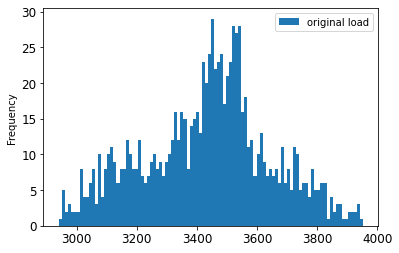

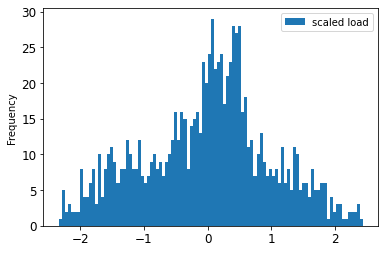

In [21]:
stlf_data[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7201) & (valid.index <=8161)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,1.097427,0.184515,0.349572,-1.658081,-0.951768,0.499675,1.194520,1.015943,0.421351,2.417198,1.257447,2.026183,1.128720,0.837171
7202,1.244116,0.100249,0.462723,-1.658081,-0.951768,0.499675,1.284162,1.020653,0.684918,2.283436,1.159441,1.922638,1.176282,0.761460
7203,1.192065,0.015983,0.575874,-1.658081,-0.951768,0.499675,1.369085,1.199611,0.835528,2.186574,1.709131,1.926780,1.206214,0.619503
7204,1.106891,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.236982,1.161935,0.868474,2.085100,1.943495,1.790101,1.225895,0.676286
7205,0.936541,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.090724,1.190192,1.014377,2.108162,1.675042,1.674130,1.218105,0.524864
7206,0.998056,-0.058370,0.604630,-1.513750,-0.951768,0.499675,1.236982,1.279671,1.019084,2.181962,1.632430,1.607862,1.215235,0.534328
7207,0.903418,-0.132722,0.633385,-1.513750,-0.951768,0.499675,1.185084,1.364441,1.197933,2.043588,1.487550,1.309652,1.188583,0.406566
7208,0.770924,-0.132722,0.633385,-1.369419,-0.951768,0.499675,1.100160,1.232577,1.160280,1.932889,1.432155,1.313794,1.153731,0.222021
7209,0.685750,-0.132722,0.633385,-1.369419,-0.951768,0.499675,0.930313,1.086585,1.188519,1.757615,1.363977,1.297227,1.109039,0.103723
7210,0.557988,-0.258295,0.733908,-1.369419,-0.951768,0.499675,0.991646,1.232577,1.277944,1.614628,1.291537,1.247525,1.045485,0.061136


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7201,1.097427,0.184515,0.349572,-1.658081,-0.951768,0.499675,1.194520,1.015943,0.421351,2.417198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097427
7202,1.244116,0.100249,0.462723,-1.658081,-0.951768,0.499675,1.284162,1.020653,0.684918,2.283436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097427,1.244116
7203,1.192065,0.015983,0.575874,-1.658081,-0.951768,0.499675,1.369085,1.199611,0.835528,2.186574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097427,1.244116,1.192065
7204,1.106891,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.236982,1.161935,0.868474,2.085100,...,NaN,NaN,NaN,NaN,NaN,NaN,1.097427,1.244116,1.192065,1.106891
7205,0.936541,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.090724,1.190192,1.014377,2.108162,...,NaN,NaN,NaN,NaN,NaN,1.097427,1.244116,1.192065,1.106891,0.936541
7206,0.998056,-0.058370,0.604630,-1.513750,-0.951768,0.499675,1.236982,1.279671,1.019084,2.181962,...,NaN,NaN,NaN,NaN,1.097427,1.244116,1.192065,1.106891,0.936541,0.998056
7207,0.903418,-0.132722,0.633385,-1.513750,-0.951768,0.499675,1.185084,1.364441,1.197933,2.043588,...,NaN,NaN,NaN,1.097427,1.244116,1.192065,1.106891,0.936541,0.998056,0.903418
7208,0.770924,-0.132722,0.633385,-1.369419,-0.951768,0.499675,1.100160,1.232577,1.160280,1.932889,...,NaN,NaN,1.097427,1.244116,1.192065,1.106891,0.936541,0.998056,0.903418,0.770924
7209,0.685750,-0.132722,0.633385,-1.369419,-0.951768,0.499675,0.930313,1.086585,1.188519,1.757615,...,NaN,1.097427,1.244116,1.192065,1.106891,0.936541,0.998056,0.903418,0.770924,0.685750
7210,0.557988,-0.258295,0.733908,-1.369419,-0.951768,0.499675,0.991646,1.232577,1.277944,1.614628,...,1.097427,1.244116,1.192065,1.106891,0.936541,0.998056,0.903418,0.770924,0.685750,0.557988


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7211,0.534328,-0.383868,0.834431,-1.369419,-0.951768,0.499675,0.897287,1.180773,1.362662,1.360942,...,1.244116,1.192065,1.106891,0.936541,0.998056,0.903418,0.770924,0.685750,0.557988,0.534328
7212,0.515400,-0.383868,0.834431,-1.225087,-0.951768,0.499675,0.765183,1.096003,1.230878,1.448579,...,1.192065,1.106891,0.936541,0.998056,0.903418,0.770924,0.685750,0.557988,0.534328,0.515400
7213,0.430226,-0.383868,0.834431,-1.225087,-0.951768,0.499675,0.680259,0.926464,1.084975,1.342493,...,1.106891,0.936541,0.998056,0.903418,0.770924,0.685750,0.557988,0.534328,0.515400,0.430226
7214,0.326123,-0.408652,0.833777,-1.225087,-0.951768,0.499675,0.552874,0.987687,1.230878,1.296368,...,0.936541,0.998056,0.903418,0.770924,0.685750,0.557988,0.534328,0.515400,0.430226,0.326123
7215,0.373443,-0.433436,0.833123,-1.225087,-0.951768,0.499675,0.529284,0.893498,1.179106,1.190281,...,0.998056,0.903418,0.770924,0.685750,0.557988,0.534328,0.515400,0.430226,0.326123,0.373443


In [25]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7211,-0.071358
7212,-0.109213
7213,-0.236975
7214,-0.232243
7215,0.098991
...,...
8057,0.496473
8058,0.539060
8059,0.576915
8060,0.430226


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
7211,0.534328,0.534328,0.557988,0.685750,0.770924,0.903418,0.998056,0.936541,1.106891,1.192065,...,-1.369419,-0.951768,0.499675,0.897287,1.180773,1.362662,1.360942,1.133874,0.957600,0.972501
7212,0.515400,0.515400,0.534328,0.557988,0.685750,0.770924,0.903418,0.998056,0.936541,1.106891,...,-1.225087,-0.951768,0.499675,0.765183,1.096003,1.230878,1.448579,1.082740,0.982450,0.909358
7213,0.430226,0.430226,0.515400,0.534328,0.557988,0.685750,0.770924,0.903418,0.998056,0.936541,...,-1.225087,-0.951768,0.499675,0.680259,0.926464,1.084975,1.342493,0.971949,0.916182,0.851545
7214,0.326123,0.326123,0.430226,0.515400,0.534328,0.557988,0.685750,0.770924,0.903418,0.998056,...,-1.225087,-0.951768,0.499675,0.552874,0.987687,1.230878,1.296368,0.618273,0.924465,0.772001
7215,0.373443,0.373443,0.326123,0.430226,0.515400,0.534328,0.557988,0.685750,0.770924,0.903418,...,-1.225087,-0.951768,0.499675,0.529284,0.893498,1.179106,1.190281,0.839853,0.688383,0.701067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,0.468081,0.468081,0.368711,0.416030,0.520132,0.236217,0.231485,0.207825,0.231485,0.032744,...,1.517204,-0.393374,0.499675,0.232050,0.026963,0.294275,0.051001,-1.179939,-0.537589,0.278334
8058,0.529596,0.529596,0.468081,0.368711,0.416030,0.520132,0.236217,0.231485,0.207825,0.231485,...,1.517204,-0.393374,0.499675,0.515130,0.224759,0.167198,0.138638,-0.996709,-0.347066,0.309086
8059,0.557988,0.557988,0.529596,0.468081,0.368711,0.416030,0.520132,0.236217,0.231485,0.207825,...,1.517204,-0.393374,0.499675,0.411334,0.201212,0.336634,0.406161,-0.779390,-0.338783,0.327537
8060,0.496473,0.496473,0.557988,0.529596,0.468081,0.368711,0.416030,0.520132,0.236217,0.231485,...,1.661535,-0.393374,0.499675,0.364154,0.224759,0.021295,0.253950,-0.792173,-0.276656,0.368129


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(851, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(851,2,1,12)
print(X_valid.shape)

(851, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(64,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.00001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 67,649
Trainable params: 67,649
Non-trainable params: 0
____________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
24/24 [==============================] - 1s 29ms/step - loss: 0.9386 - val_loss: 0.9349
Epoch 2/300
24/24 [==============================] - 0s 12ms/step - loss: 0.9097 - val_loss: 0.9127
Epoch 3/300
24/24 [==============================] - 0s 12ms/step - loss: 0.8817 - val_loss: 0.8916
Epoch 4/300
24/24 [==============================] - 0s 12ms/step - loss: 0.8547 - val_loss: 0.8709
Epoch 5/300
24/24 [==============================] - 0s 11ms/step - loss: 0.8279 - val_loss: 0.8508
Epoch 6/300
24/24 [==============================] - 0s 11ms/step - loss: 0.8019 - val_loss: 0.8314
Epoch 7/300
24/24 [==============================] - 0s 11ms/step - loss: 0.7762 - val_loss: 0.8125
Epoch 8/300
24/24 [==============================] - 0s 11ms/step - loss: 0.7510 - val_loss: 0.7941
Epoch 9/300
24/24 [==============================] - 0s 12ms/step - loss: 0.7262 - val_loss: 0.7766
Epoch 10/300
24/24 [==============================] - 0s 12ms/step - loss: 0.7019 - val_loss: 0.7598

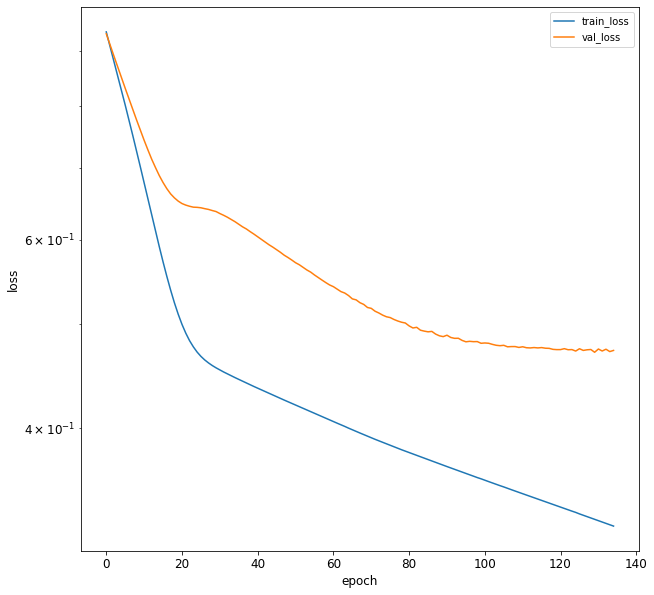

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,3490.0,28.367450,80.524480,1.0,5.0,1.0,3549.0,3570.0,3512.0,3480.0,3429.0,3300.0,3540.000000
8163,3468.0,28.072450,80.993590,1.0,5.0,1.0,3557.0,3588.0,3551.0,3465.0,3441.0,3256.0,3533.083333
8164,3457.0,28.072450,80.993590,2.0,5.0,1.0,3526.0,3540.0,3538.0,3408.0,3421.0,3244.0,3526.333333
8165,3381.0,28.072450,80.993590,2.0,5.0,1.0,3482.0,3540.0,3549.0,3339.0,3353.0,3201.0,3512.333333
8166,3399.0,27.527450,84.024353,2.0,5.0,1.0,3490.0,3549.0,3570.0,3288.0,3351.0,3185.0,3498.083333
8167,3385.0,26.982450,87.055115,2.0,5.0,1.0,3468.0,3557.0,3588.0,3282.0,3282.0,3153.0,3481.166667
8168,3350.0,26.982450,87.055115,3.0,5.0,1.0,3457.0,3526.0,3540.0,3304.0,3281.0,3117.0,3465.333333
8169,3326.0,26.982450,87.055115,3.0,5.0,1.0,3381.0,3482.0,3540.0,3291.0,3228.0,3122.0,3447.500000
8170,3321.0,27.122450,85.408722,3.0,5.0,1.0,3399.0,3490.0,3549.0,3271.0,3222.0,3094.0,3428.500000
8171,3301.0,27.262451,83.762330,3.0,5.0,1.0,3385.0,3468.0,3557.0,3253.0,3205.0,3093.0,3407.166667


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8162 to 8373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


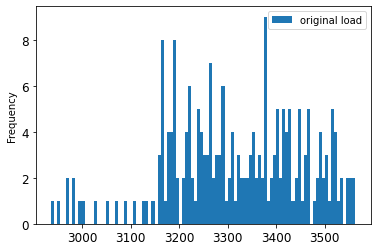

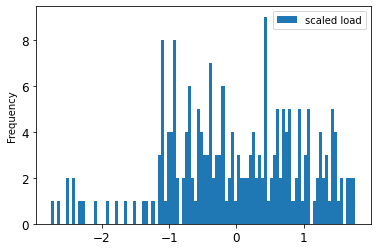

In [36]:
stlf_data[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8162) & (test.index <= 8373)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,1.243697,-0.193343,0.302048,-1.498364,-1.004934,0.340279,1.661252,1.813155,1.320477,0.932265,0.523804,-0.130136,1.760353,0.543059
8163,1.084789,-0.301916,0.340226,-1.498364,-1.004934,0.340279,1.721473,1.954644,1.635181,0.809058,0.609076,-0.401946,1.701735,0.174682
8164,1.005335,-0.301916,0.340226,-1.357685,-1.004934,0.340279,1.488118,1.577338,1.530280,0.340872,0.466955,-0.476077,1.644529,0.080783
8165,0.456382,-0.301916,0.340226,-1.357685,-1.004934,0.340279,1.156904,1.577338,1.619042,-0.225879,-0.016257,-0.741710,1.525880,-0.107017
8166,0.586397,-0.502498,0.586882,-1.357685,-1.004934,0.340279,1.217125,1.648083,1.788498,-0.644783,-0.030469,-0.840550,1.405112,-0.395940
8167,0.485274,-0.703081,0.833537,-1.357685,-1.004934,0.340279,1.051518,1.710967,1.933746,-0.694065,-0.520787,-1.038230,1.261744,-0.410386
8168,0.232467,-0.703081,0.833537,-1.217006,-1.004934,0.340279,0.968715,1.467290,1.546418,-0.513362,-0.527893,-1.260621,1.127557,-0.684863
8169,0.059113,-0.703081,0.833537,-1.217006,-1.004934,0.340279,0.396618,1.121426,1.546418,-0.620141,-0.904514,-1.229733,0.976421,-0.728201
8170,0.022998,-0.651555,0.699547,-1.217006,-1.004934,0.340279,0.532115,1.184311,1.619042,-0.784417,-0.947151,-1.402704,0.815397,-0.952116
8171,-0.121463,-0.600029,0.565558,-1.217006,-1.004934,0.340279,0.426729,1.011378,1.683597,-0.932265,-1.067954,-1.408881,0.634598,-0.901555


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8162,1.243697,-0.193343,0.302048,-1.498364,-1.004934,0.340279,1.661252,1.813155,1.320477,0.932265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.243697
8163,1.084789,-0.301916,0.340226,-1.498364,-1.004934,0.340279,1.721473,1.954644,1.635181,0.809058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.243697,1.084789
8164,1.005335,-0.301916,0.340226,-1.357685,-1.004934,0.340279,1.488118,1.577338,1.530280,0.340872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.243697,1.084789,1.005335
8165,0.456382,-0.301916,0.340226,-1.357685,-1.004934,0.340279,1.156904,1.577338,1.619042,-0.225879,...,NaN,NaN,NaN,NaN,NaN,NaN,1.243697,1.084789,1.005335,0.456382
8166,0.586397,-0.502498,0.586882,-1.357685,-1.004934,0.340279,1.217125,1.648083,1.788498,-0.644783,...,NaN,NaN,NaN,NaN,NaN,1.243697,1.084789,1.005335,0.456382,0.586397
8167,0.485274,-0.703081,0.833537,-1.357685,-1.004934,0.340279,1.051518,1.710967,1.933746,-0.694065,...,NaN,NaN,NaN,NaN,1.243697,1.084789,1.005335,0.456382,0.586397,0.485274
8168,0.232467,-0.703081,0.833537,-1.217006,-1.004934,0.340279,0.968715,1.467290,1.546418,-0.513362,...,NaN,NaN,NaN,1.243697,1.084789,1.005335,0.456382,0.586397,0.485274,0.232467
8169,0.059113,-0.703081,0.833537,-1.217006,-1.004934,0.340279,0.396618,1.121426,1.546418,-0.620141,...,NaN,NaN,1.243697,1.084789,1.005335,0.456382,0.586397,0.485274,0.232467,0.059113
8170,0.022998,-0.651555,0.699547,-1.217006,-1.004934,0.340279,0.532115,1.184311,1.619042,-0.784417,...,NaN,1.243697,1.084789,1.005335,0.456382,0.586397,0.485274,0.232467,0.059113,0.022998
8171,-0.121463,-0.600029,0.565558,-1.217006,-1.004934,0.340279,0.426729,1.011378,1.683597,-0.932265,...,1.243697,1.084789,1.005335,0.456382,0.586397,0.485274,0.232467,0.059113,0.022998,-0.121463


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8172,-0.265925,-0.600029,0.565558,-1.076327,-1.004934,0.340279,0.163263,0.924912,1.433448,-0.973334,...,1.084789,1.005335,0.456382,0.586397,0.485274,0.232467,0.059113,0.022998,-0.121463,-0.265925
8173,-0.374271,-0.600029,0.565558,-1.076327,-1.004934,0.340279,-0.017399,0.327511,1.078397,-1.359382,...,1.005335,0.456382,0.586397,0.485274,0.232467,0.059113,0.022998,-0.121463,-0.265925,-0.374271
8174,-0.778763,-0.719642,0.643599,-1.076327,-1.004934,0.340279,-0.055037,0.469000,1.142952,-1.203320,...,0.456382,0.586397,0.485274,0.232467,0.059113,0.022998,-0.121463,-0.265925,-0.374271,-0.778763
8175,-1.017124,-0.839255,0.721641,-1.076327,-1.004934,0.340279,-0.205588,0.358953,0.965427,-1.293672,...,0.586397,0.485274,0.232467,0.059113,0.022998,-0.121463,-0.265925,-0.374271,-0.778763,-1.017124
8176,-0.908778,-0.839255,0.721641,-0.935648,-1.004934,0.340279,-0.356140,0.083834,0.876664,-1.449734,...,0.485274,0.232467,0.059113,0.022998,-0.121463,-0.265925,-0.374271,-0.778763,-1.017124,-0.908778


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8172,-1.046016
8173,-1.125470
8174,-1.118247
8175,-1.125470
8176,-1.096578
...,...
8269,-2.656761
8270,-2.757884
8271,-2.490630
8272,-2.418399


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
8172,-0.265925,-0.265925,-0.121463,0.022998,0.059113,0.232467,0.485274,0.586397,0.456382,1.005335,...,-1.076327,-1.004934,0.340279,0.163263,0.924912,1.433448,-0.973334,-1.359302,-1.686870,0.461568
8173,-0.374271,-0.374271,-0.265925,-0.121463,0.022998,0.059113,0.232467,0.485274,0.586397,0.456382,...,-1.076327,-1.004934,0.340279,-0.017399,0.327511,1.078397,-1.359382,-1.799878,-1.847485,0.309019
8174,-0.778763,-0.778763,-0.374271,-0.265925,-0.121463,0.022998,0.059113,0.232467,0.485274,0.586397,...,-1.076327,-1.004934,0.340279,-0.055037,0.469000,1.142952,-1.203320,-1.700393,-1.872195,0.111270
8175,-1.017124,-1.017124,-0.778763,-0.374271,-0.265925,-0.121463,0.022998,0.059113,0.232467,0.485274,...,-1.076327,-1.004934,0.340279,-0.205588,0.358953,0.965427,-1.293672,-1.743029,-1.798065,-0.094247
8176,-0.908778,-0.908778,-1.017124,-0.778763,-0.374271,-0.265925,-0.121463,0.022998,0.059113,0.232467,...,-0.935648,-1.004934,0.340279,-0.356140,0.083834,0.876664,-1.449734,-1.870938,-1.859840,-0.281402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,-0.728201,-0.728201,-0.684863,-0.410386,-0.395940,-0.107017,0.080783,0.174682,0.543059,0.795866,...,-1.076327,0.516823,0.340279,-0.190533,0.696956,1.118744,-0.825486,-1.096378,-1.353284,0.116920
8270,-0.952116,-0.952116,-0.728201,-0.684863,-0.410386,-0.395940,-0.107017,0.080783,0.174682,0.543059,...,-1.076327,0.516823,0.340279,-0.491636,0.421837,1.126813,-1.285458,-0.961363,-1.266799,-0.096366
8271,-0.901555,-0.901555,-0.952116,-0.728201,-0.684863,-0.410386,-0.395940,-0.107017,0.080783,0.174682,...,-1.076327,0.516823,0.340279,-0.506692,0.020949,0.884733,-1.556513,-1.039529,-1.303864,-0.283521
8272,-1.046016,-1.046016,-0.901555,-0.952116,-0.728201,-0.684863,-0.410386,-0.395940,-0.107017,0.080783,...,-0.935648,0.516823,0.340279,-0.792740,-0.081238,0.804040,-1.433306,-1.174545,-1.415059,-0.477738


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,2,1,12)

In [45]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.4340245723724365s


In [46]:
feature=stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3317.816038
dtype: float64
Cons    138.772988
dtype: float64


In [47]:
load_mean=3317.816038
load_std=138.772988
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+100
8172,3172.657240
8173,3161.631205
8174,3162.633572
8175,3161.631205
8176,3165.640672
...,...
8269,2949.129430
8270,2935.096293
8271,2972.183867
8272,2982.207536


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[3290.191 ],
       [3259.7656],
       [3258.6956],
       [3252.5398],
       [3244.4045],
       [3240.3232],
       [3221.166 ],
       [3217.5117],
       [3218.3518],
       [3219.5842],
       [3194.9263],
       [3190.878 ],
       [3193.1172],
       [3212.9714],
       [3210.6274],
       [3217.7656],
       [3211.901 ],
       [3228.6677],
       [3232.7769],
       [3237.5046],
       [3246.3223],
       [3250.8428],
       [3266.6726],
       [3298.199 ],
       [3332.621 ],
       [3288.7034],
       [3282.7275],
       [3313.944 ],
       [3331.3787],
       [3336.945 ],
       [3339.287 ],
       [3316.316 ],
       [3362.6772],
       [3382.0835],
       [3401.7515],
       [3400.3494],
       [3387.6577],
       [3380.2278],
       [3386.5554],
       [3381.3445],
       [3398.5469],
       [3388.0725],
       [3371.8425],
       [3387.1824],
       [3400.2605],
       [3409.1455],
       [3414.8123],
       [3429.6953],
       [3435.184 ],
       [3425.771 ],


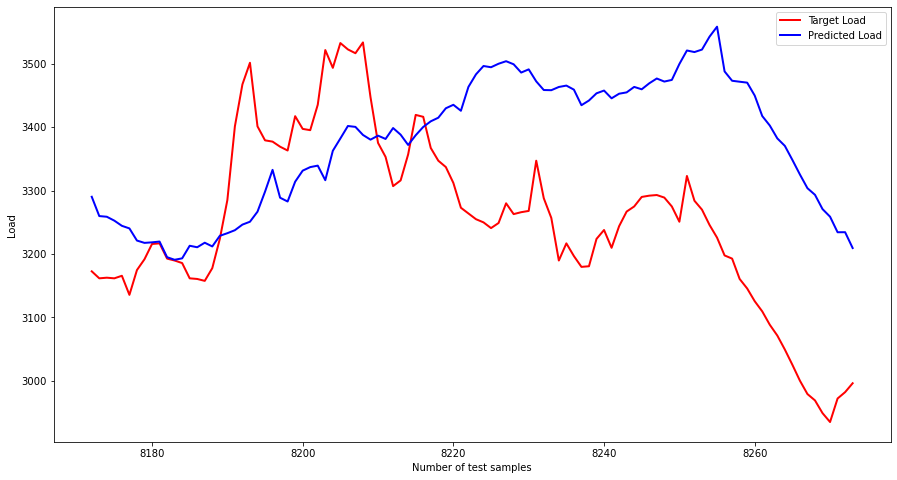

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

5.214715293379558


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -3.844484
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8172  317162.019450
8173  316060.016563
8174  316160.319762
8175  316060.245111
8176  316461.579140
...             ...
8269  294802.036812
8270  293398.600873
8271  297109.569063
8272  298112.299159
8273  299516.953898

[102 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+100
8172   13814.165382
8173    9630.364426
8174    9227.904956
8175    8264.371757
8176    6203.747020
...             ...
8269  103449.842241
8270  104779.221511
8271   68684.672197
8272   63569.100146
8273   45425.305085

[102 rows x 1 columns]
y_t+100    38411.673736
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    195.988963
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,102):
    b=a[i]
    print(b)

[3290.191]
[3259.7656]
[3258.6956]
[3252.5398]
[3244.4045]
[3240.3232]
[3221.166]
[3217.5117]
[3218.3518]
[3219.5842]
[3194.9263]
[3190.878]
[3193.1172]
[3212.9714]
[3210.6274]
[3217.7656]
[3211.901]
[3228.6677]
[3232.7769]
[3237.5046]
[3246.3223]
[3250.8428]
[3266.6726]
[3298.199]
[3332.621]
[3288.7034]
[3282.7275]
[3313.944]
[3331.3787]
[3336.945]
[3339.287]
[3316.316]
[3362.6772]
[3382.0835]
[3401.7515]
[3400.3494]
[3387.6577]
[3380.2278]
[3386.5554]
[3381.3445]
[3398.5469]
[3388.0725]
[3371.8425]
[3387.1824]
[3400.2605]
[3409.1455]
[3414.8123]
[3429.6953]
[3435.184]
[3425.771]
[3463.4111]
[3483.1528]
[3496.3196]
[3494.3865]
[3499.9001]
[3503.889]
[3499.0498]
[3485.9885]
[3491.0361]
[3472.0947]
[3458.4695]
[3458.194]
[3463.267]
[3465.459]
[3459.0618]
[3434.5242]
[3441.9448]
[3453.2656]
[3457.617]
[3445.3997]
[3452.6484]
[3454.7498]
[3463.372]
[3459.624]
[3469.0342]
[3476.6233]
[3471.805]
[3474.3904]
[3499.4756]
[3520.79]
[3518.3076]
[3522.2173]
[3542.5327]
[3558.308]
[3487.7974]
[34